
# Camvid-Imdb-example-Fastai
> A quick glance at how to create linear regression
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [beginner]

In [ ]:
# hide
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install fastai2 --quiet

In [2]:

!pip install nbdev 
!pip install fastcore

     |████████████████████████████████| 45 kB 992 kB/s eta 0:00:011


In [3]:
from fastai2.vision.all import *

In [11]:
# gathering the dataset 
path = untar_data(URLs.CAMVID_TINY)

In [12]:
#hide
??get_image_files

In [19]:
dls = SegmentationDataLoaders.from_label_func(path,
                                              bs= 64,
                                              fnames= get_image_files(path/"images"),
                                              label_func= lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
                                              codes= np.loadtxt(path/'codes.txt', dtype=str)
                                              )

In [14]:
import functools, traceback
class gpu_mem_restore_ctx():
    " context manager to reclaim GPU RAM if CUDA out of memory happened, or execution was interrupted"
    def __enter__(self): return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        if not exc_val: return True
        traceback.clear_frames(exc_tb)
        raise exc_type(exc_val).with_traceback(exc_tb) from None

In [20]:
learn = unet_learner(dls, resnet34)

In [21]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.736854,3.571304,00:00


epoch,train_loss,valid_loss,time
0,3.582396,3.382562,00:00
1,3.461463,3.738088,00:00
2,3.229613,2.772933,00:00
3,3.056785,27.153690,00:00
4,5.184041,4.426192,00:00
5,4.995150,2.705719,00:00
6,4.614924,2.713920,00:00
7,4.330629,2.718229,00:00


In [16]:
with gpu_mem_restore_ctx():
    learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,3.543984,3.283773,00:04


epoch,train_loss,valid_loss,time
0,3.335565,2.785197,00:00
1,3.104301,15.021441,00:00
2,4.845769,4.041796,00:00
3,4.655784,2.902167,00:00
4,4.267091,2.794876,00:00
5,3.980669,2.747960,00:00
6,3.766608,2.455791,00:00
7,3.571517,2.385206,00:00
8,3.409564,2.313739,00:00
9,3.269744,2.286877,00:00


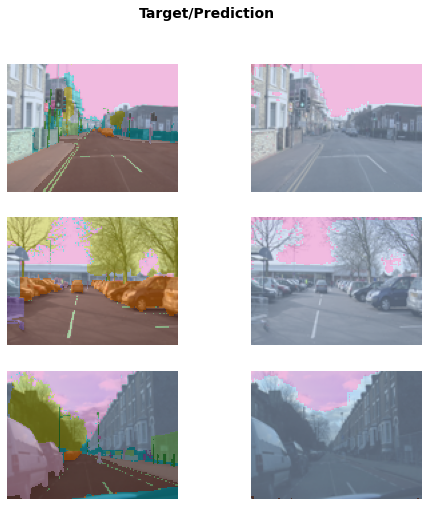

In [22]:
learn.show_results(max_n = 9, figsize=(8, 8))

### NLP text example

In [24]:
from fastai2.text.all import *

In [27]:
path2 = untar_data(URLs.IMDB)


In [28]:
textdls = TextDataLoaders.from_folder(path2, valid = 'test')

In [29]:
textlearner = text_classifier_learner(textdls, 
                                     AWD_LSTM,
                                     drop_mult= .5,
                                     metrics = accuracy)

In [30]:
with gpu_mem_restore_ctx():
    textlearner.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.607154,0.396850,0.817360,02:17


epoch,train_loss,valid_loss,accuracy,time
0,0.343570,0.318869,0.859280,04:10
1,0.247592,0.213031,0.914760,04:15
2,0.198262,0.206739,0.921840,04:08
3,0.189943,0.215887,0.918880,04:17


In [44]:
textlearner.predict("The movie was fucking great")

('pos', tensor(1), tensor([0.0649, 0.9351]))

In [45]:
!pip install jovian --upgrade

     |████████████████████████████████| 63 kB 1.1 MB/s eta 0:00:011
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=7e7aef5316b0b7eadf3ed3f60f954dbedb05bde3c44654e5d07a23a1603da8f9
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [51]:
import jovian
project = "2020-07-23-fastai-camvid-Imdb"

In [ ]:
jovian.commit(project = project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/sivaramakrishnan1998/2020-07-23-fastai-camvid-Imdb


<IPython.core.display.Javascript object>